# MNIST ASSIGNMENT:

We need to:

-  define a new network such that:

  - it has less than 15000 parameters
  
  - it achieves validation accuracy of more than 99.4% (basically print(score) should be more than 0.994)

- Once done, upload the link to your Github Project to LMS.


## Getting things ready!

We set seed so not to lose our progress due to randomness.

We later on the following libraries:

1. Keras ([Keras Documentation](https://keras.io/)) :- Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
We import keras layers, model type Sequential (since we will be building a sequential model), and utils for plotting model and for converting single class to categorical 10 classes.

2. We also import Train_test_split, Model checkpoints to save the model and ImageDataGenerator just to create a batch flow into the network. **(We are not using any augumentation techniques & other tuning parameters)**.

The whole model is in itself is most basic & default.

In [0]:
import numpy as np
np.random.seed(25)

In [2]:
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from keras.models import (Sequential,
                          load_model)

from keras.layers import (Dropout,
                          Activation,
                          Flatten,Conv2D,
                          MaxPooling2D,
                          BatchNormalization)

from keras.utils import (np_utils,
                         plot_model)

from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

import datetime

from keras.datasets import mnist

## Load pre-shuffled MNIST data into Train set and Test set

After loading the Train and Test sets, we initially plot any one image from the Train set and see how the images really look like. 

We then reshape our data into 28x28x1, which would be input to our network. Here 28x28 is the image Height x Width and 1 is the number of channels. We also standardise our pixel (range: 0-255) values so as to obtain normally distributed pixel values between range 0-1, and also due to computational reasons.

We explore total number of digits on each class and then, convert our target variable into categorical 10 classes output, where each bit is set to 1 corresponding to the actual digit value. 

- Example: if the digit value is 6, then the 6th column is set to 1 and the rest 9 columns are set to 0.


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


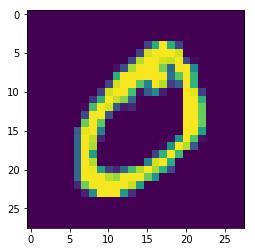

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### Exploratary Data Analysis : 

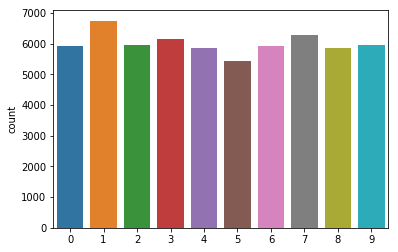

In [9]:
sns.countplot(y_train)

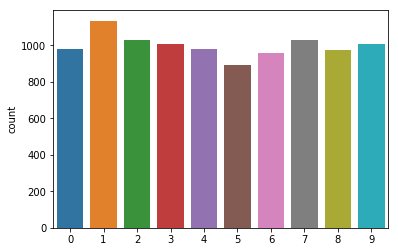

In [10]:
sns.countplot(y_test)

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Trying out an architecture to check if it can come close to 99.4%. 

### In this notebook, we first initialize the model irrespective of number of parameters to check the accuracy.

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu',name="Conv2D_1", input_shape = (28, 28, 1)))
model.add(Conv2D(64, kernel_size = 3,name="Conv2D_2", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_1"))

model.add(Conv2D(32, kernel_size = 3,name="Conv2D_3", activation='relu'))
model.add(Conv2D(32, kernel_size = 3,name="Conv2D_4", activation='relu'))
model.add(Conv2D(64, kernel_size = 3,name="Conv2D_5", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),name="MaxPool2D_2"))

model.add(Conv2D(32,kernel_size=(1,1),name="Conv2D_6",activation='relu'))
model.add(Conv2D(10, kernel_size = 3,name="Conv2D_7"))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
Conv2D_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
MaxPool2D_1 (MaxPooling2D)   (None, 12, 12, 64)        0         
_________________________________________________________________
Conv2D_3 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
Conv2D_4 (Conv2D)            (None, 8, 8, 32)          9248      
_________________________________________________________________
Conv2D_5 (Conv2D)            (None, 6, 6, 64)          18496     
_________________________________________________________________
MaxPool2D_2 (MaxPooling2D)   (None, 3, 3, 64)          0         
__________

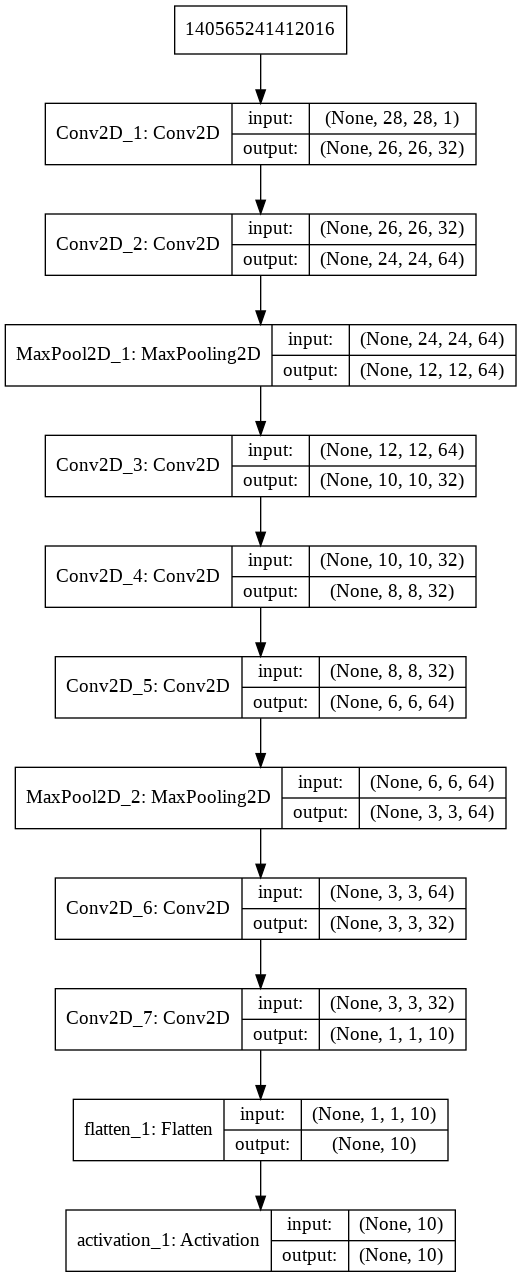

In [15]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
from IPython.display import Image
Image(retina=True, filename='model.png')

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
model.fit(X_train, Y_train, batch_size=256, validation_data=(X_test, Y_test), nb_epoch=30, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 12s 208us/step - loss: 0.3738 - acc: 0.8772 - val_loss: 0.0800 - val_acc: 0.9742
Epoch 2/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0762 - acc: 0.9762 - val_loss: 0.0494 - val_acc: 0.9846
Epoch 3/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.0524 - acc: 0.9837 - val_loss: 0.0417 - val_acc: 0.9861
Epoch 4/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0403 - acc: 0.9869 - val_loss: 0.0292 - val_acc: 0.9900
Epoch 5/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0353 - acc: 0.9884 - val_loss: 0.0373 - val_acc: 0.9881
Epoch 6/30
60000/60000 [==============================] - 8s 133us/step - loss: 0.0310 - acc: 0.9901 - val_loss: 0.0321 - val_acc: 0.9887
Epoch 7/30
60000/60000 [==============================] - 8s 134us/step -

In [18]:
print(round(max(model.history.history['val_acc']),4))

0.9938


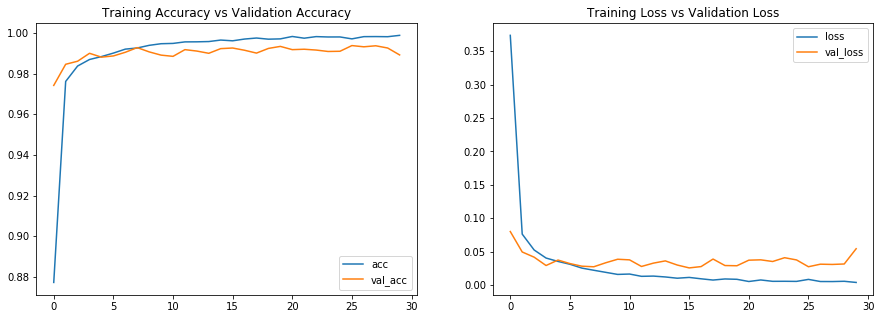

In [19]:
def plot_(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    f, [ax1, ax2] = plt.subplots(1,2, figsize=(15, 5))
    ax1.plot(range(len(acc)), acc, label="acc")
    ax1.plot(range(len(acc)), val_acc, label="val_acc")
    ax1.set_title("Training Accuracy vs Validation Accuracy")
    ax1.legend()

    ax2.plot(range(len(loss)), loss, label="loss")
    ax2.plot(range(len(loss)), val_loss, label="val_loss")
    ax2.set_title("Training Loss vs Validation Loss")
    ax2.legend()
    
    
plot_(model.history)

In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[7.10812050e-17 6.50984163e-20 3.31341565e-10 1.30015226e-12
  1.09111171e-21 3.67924351e-16 8.08925089e-26 1.00000000e+00
  1.63354082e-14 3.82007370e-10]
 [8.19854439e-18 1.39432674e-17 1.00000000e+00 2.64283740e-19
  2.97947639e-22 4.16072112e-25 2.12219480e-19 9.51772931e-27
  8.47060761e-19 1.36432219e-22]
 [5.76886372e-10 9.99991179e-01 2.41717917e-08 1.72243136e-10
  3.39655031e-07 2.95354289e-06 4.13858858e-09 5.05394519e-06
  2.54700552e-07 2.09966018e-07]
 [1.00000000e+00 1.23650730e-17 3.32544647e-13 6.39772388e-14
  9.64618802e-16 1.91150156e-13 5.36604702e-12 5.01469346e-17
  2.77246646e-11 1.02589530e-12]
 [1.80526373e-21 2.78606573e-17 3.86333547e-17 1.69080060e-18
  1.00000000e+00 1.48283335e-16 8.12001981e-17 6.61928561e-16
  3.01727447e-13 1.38336287e-09]
 [9.52710411e-11 9.99988317e-01 5.43112186e-08 2.74582111e-11
  3.02377600e-07 1.24470773e-07 3.75641046e-10 9.89008822e-06
  3.17155354e-07 9.57169277e-07]
 [4.29609700e-29 1.33349617e-14 9.98785776e-12 4.62097300e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

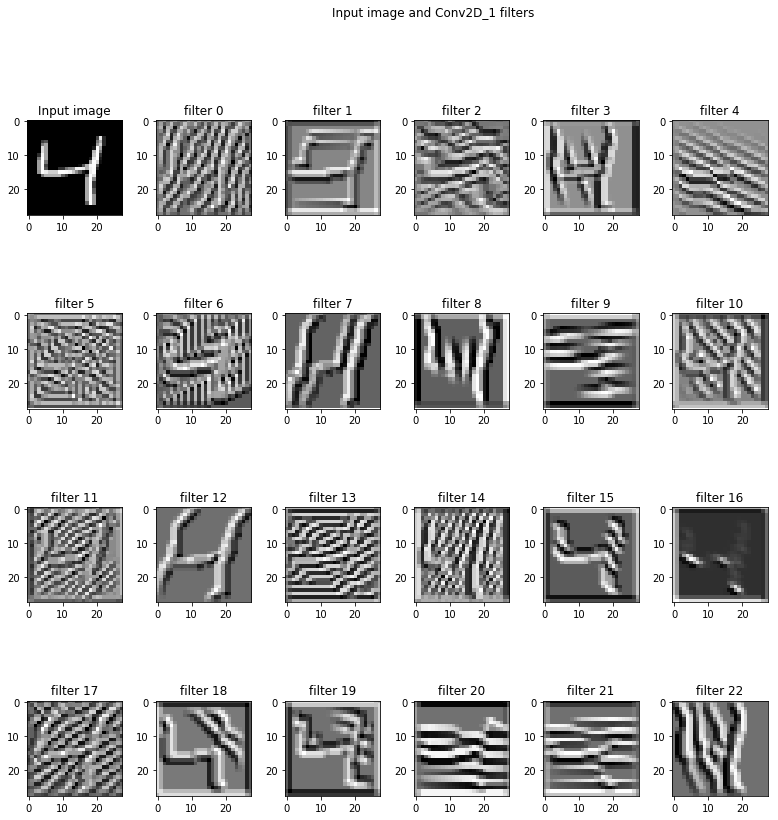

In [23]:
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'Conv2D_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()